# Plots in Python manual

<a name="contents"></a>
# Contents
- [Pandas](#pandas)
    - [basic](#pdbasic)
    - [plot types](#pdtypes)
    - [subplots](#pdsubplots)
- [MatPlotLib](#matplotlib)
    - [plot types](#plttypes)
    - [figures and axes](#fax)
    - [multiple axis](#mult_ax)
    - [Object-Oriented style](#oos)
    - [Pyplot style](#ps)
    - [function signature (recommended)](#signature)
    - [formatting](#formatting)
    - [keyword strings (dictionaries)](#keyword)
    - [categorical variables](#cat)
    - [subplots](#pltsubplots)
    - [text](#text)
    - [text annotations](#annotations)
    - [different axis scales](#scales)
    - [save plot as image](#save)
- [Seaborn](#seaborn)
    - [basic](#snsbasic)
    - [plot types](#snstypes)
    - [subplots](#snssubplots)

---
<a name="conf"></a>
# Configuration

[Return to Contents](#contents)

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display, HTML

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

display(HTML('<style>.container { width:90% !important; }</style>'))

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
%matplotlib inline

---
<a name="pandas"></a>
# Pandas

[Return to Contents](#contents)

In [4]:
x = pd.Series(np.random.randn(100)).cumsum()
# x = pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000', periods=100)).cumsum()

In [5]:
df = pd.read_csv('Data/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a name="pdbasic"></a>
### basic

[Return to Pandas](#pandas)

<a name="pdtypes"></a>
### plot types

[Return to Pandas](#pandas)

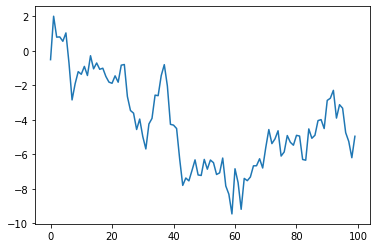

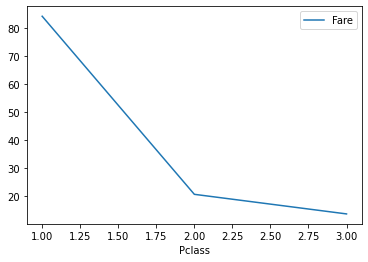

In [31]:
# --------------------- LINE PLOT
x.plot();
df.groupby('Pclass')['Fare'].agg('mean').reset_index().plot(x='Pclass', y='Fare');

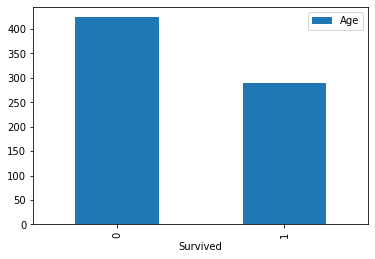

In [11]:
# --------------------- BAR PLOT
df.groupby('Survived').agg('count').reset_index().plot.bar(x='Survived', y='Age');

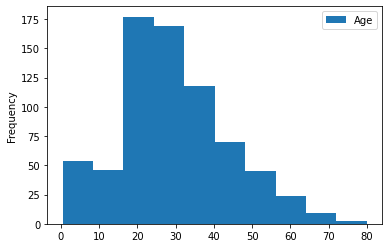

In [16]:
# --------------------- HISTOGRAM PLOT
df[['Age', 'Sex']].plot.hist();

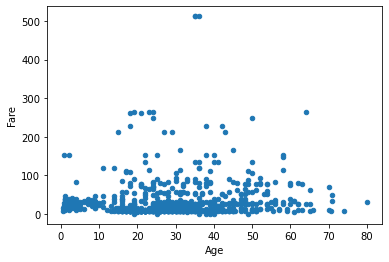

In [18]:
# --------------------- SCATTER PLOT
df.plot.scatter(x='Age', y='Fare');

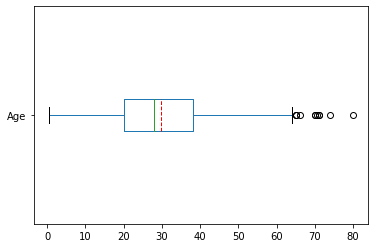

In [7]:
# --------------------- BOXPLOT
df.boxplot('Age', vert=False, grid=False, meanline=True, showmeans=True, meanprops=dict(color='red'));

<a name="pdsubplots"></a>
### subplots

[Return to Pandas](#pandas)

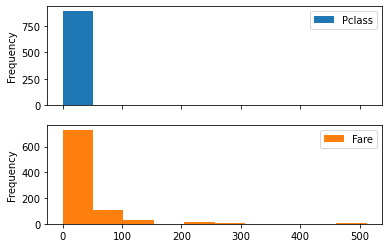

In [32]:
df[['Pclass', 'Fare']].plot.hist(subplots=True);

In [22]:
# # ax = fig.add_subplot(312)
# df[df['Pclass'] == 2][['Age']].plot.hist();

# # ax = fig.add_subplot(313)
# df[df['Pclass'] == 3][['Age']].plot.hist();

---
<a name="matplotlib"></a>
# MatPlotLib

[Return to Contents](#contents)

For a gallery of examples have a look at https://matplotlib.org/stable/gallery/index.html  
Some examples: https://towardsdatascience.com/a-practical-summary-of-matplotlib-in-13-python-snippets-4d07f0011bdf

In [46]:
x = np.random.normal(0, 1, 130)
max(x), min(x)

(4.382683788372425, -2.505896550165316)

<a name="pltbasic"></a>
### basic

[Return to MatPlotLib](#matplotlib)

REMEMBER to always put a semicolon (;) at the end of the statement to prevent showing data about the plot

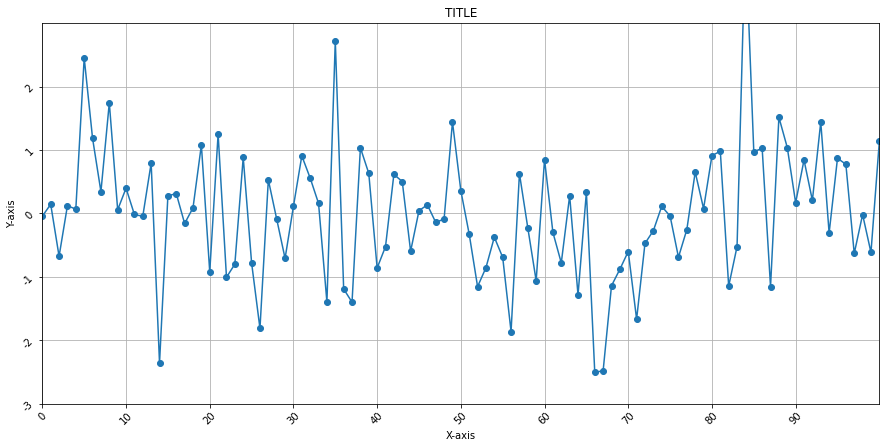

In [49]:
# create figure
fig, axs = plt.subplots(figsize=(15, 7))

# get the current axes instance of the current figure
axs = plt.gca()

# plot data
axs.plot(x, marker='o')

# set axis limit
axs.set_xlim(1, 100)
axs.set_ylim(-3, 3)
# revert axis
axs.set_xlim(axs.get_xlim()[::-1])
axs.set_ylim(axs.get_xlim()[::-1])

# add ticks labels to axes
x_ax = np.arange(0, 100, 10)
y_ax = np.arange(-3, 3, 1)
# set custom ticks to axis
axs.set_xticks(x_ax)
axs.set_yticks(y_ax)
# set custom ticks labels to axis (optionally rotate ticks labels)
axs.set_xticklabels(labels=x_ax, rotation=45)
axs.set_yticklabels(labels=y_ax, rotation=45)
# remove axis ticks labels
axs.axes.xaxis.set_ticklabels([])
axs.axes.yaxis.set_ticklabels([])

# add labels to axes
axs.set_xlabel('X-axis')
axs.set_ylabel('Y-axis')

# legend
axs.legend(loc='right')

# add title
axs.set_title('TITLE')

# add grid
axs.grid('on');

<a name="plttypes"></a>
### plot types

[Return to MatPlotLib](#matplotlib)

In [ ]:
# --------------------- LINE PLOT
plt.plot(df['x'], df['y'])

# --------------------- BAR PLOT
# you have to provide x and y values
plt.bar(df2['month'], df2['median_tot'])

# --------------------- HISTOGRAM PLOT
# you provide a list of values and a nr of bins
plt.hist(df1, bins=50)

# --------------------- BOXPLOT
plt.boxplot(df['x'], vert=False)
# to plot mean and median legend in a plt figure (here the class can be a plt figure or an ax)
# plt.plot([], [], '--', linewidth=1, color='red', label='mean')
# plt.plot([], [], '-', linewidth=1, color='orange', label='median')
# plt.legend();

<a name="fax"></a>
### figures and axes

[Return to MatPlotLib](#matplotlib)

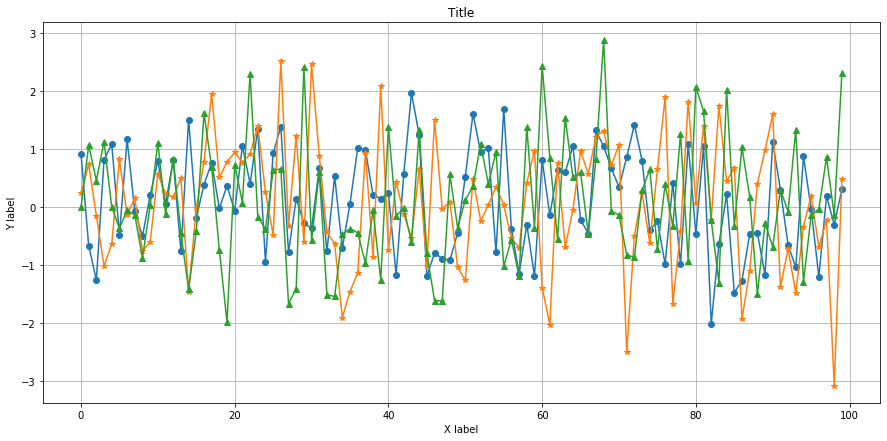

In [5]:
# create data
data1 = np.random.normal(0, 1, 100)
data2 = np.random.normal(0, 1, 100)
data3 = np.random.normal(0, 1, 100)

# create figure
fig, axs = plt.subplots(figsize=(15, 7)) 

# plot data
axs.plot(data1, marker='o')
axs.plot(data2, marker='*')
axs.plot(data3, marker='^')

# add ticks to axes
x_ax = np.arange(0, 100, 10)
y_ax = np.arange(-3, 3, 1)
axs.set_xticks(x_ax)
axs.set_xticklabels(labels=x_ax, rotation=45)
axs.set_yticks(y_ax)
axs.set_yticklabels(labels=y_ax, rotation=45)

# add labels to axes
axs.set_xlabel('X label')
axs.set_ylabel('Y label')

# add title
axs.set_title'Title')

# add grid
axs.grid('on')

<a name="oos"></a>
### Object-Oriented style

[Return to MatPlotLib](#matplotlib)

Create figures and axes explicitly, and call methods on them.

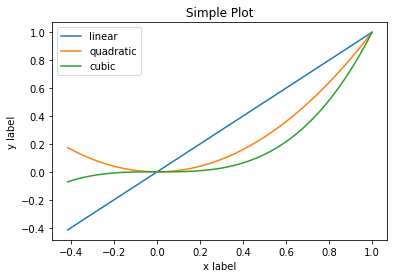

In [12]:
# create data
x = np.cos(np.linspace(0, 2, 100))

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple Plot')
ax.legend();
# the ";" at the end avoid printing matplotlib.legend.Legend obj

<a name="mult_ax"></a>
### multiple axis

[Return to MatPlotLib](#matplotlib)

In [ ]:
plt.figure(figsize=(30,5*nr_plots))

ax = plt.subplot(1,1,1)
plt.plot(df['ds'], df[f'{channel_vars[i]}_spend'])
# sns.lineplot(data=df, x='ds', y=f'{channel_vars[i]}_spend', label='Spend', color=sns.color_palette()[0])
ax2 = ax.twinx()
plt.plot(df['ds'], df[f'{channel_vars[i]}_incr])
# sns.lineplot(data=df, x='ds', y=f'{channel_vars[i]}_incr', label='Incremental Sales', color=sns.color_palette()[1], ax=ax2)
ax.legend(loc=0)
ax2.legend(loc=2)
ax.set_xlabel('')
ax.set_ylabel('')
ax2.set_ylabel('')

### dates on x axis

In [ ]:
import matplotlib.dates as mdates


fig, ax = plt.subplots(figsize = (30,5))
plt.plot(tar_au['week_end_date'], tar_au['HA Sales (Amount)'])
# sns.lineplot(data=tar_au, x='week_end_date', y='HA Sales (Amount)', label='sales amount', ax=ax);

locator = mdates.MonthLocator(bymonth=[1,2,3,4,5,6,7,8,9,10,11,12])
ax.xaxis.set_minor_locator(locator)
ax.xaxis.set_minor_formatter(mdates.ConciseDateFormatter(locator))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

<a name="ps"></a>
### Pyplot style

[Return to MatPlotLib](#matplotlib)

Rely on the pyplot module to automatically create and manage the figures and axes.

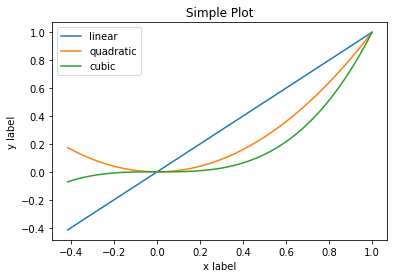

In [13]:
x = np.cos(np.linspace(0, 2, 100))

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend();

The examples from Matplotlib’s documentation use both approaches, but highlight that it is preferable to pick one of them and stick to it.  
The suggestion is to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting.

<a name="signature"></a>
### function signature (recommended)

[Return to MatPlotLib](#matplotlib)

source: https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

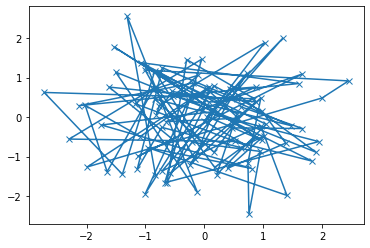

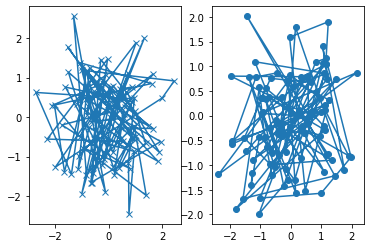

In [14]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

### formatting

[Return to MatPlotLib](#matplotlib)

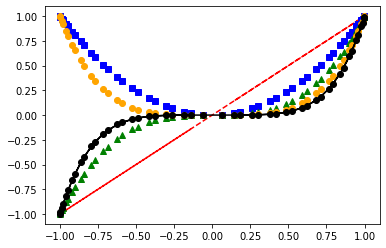

In [15]:
t = np.sin(np.linspace(-3, 3, 50))
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', color='red')
plt.plot(t, t**2, 'bs', color='blue')
plt.plot(t, t**3, 'g^', color='green')
plt.plot(t, t**4, 'o', color='orange')
plt.plot(t, t**5, 'o-', color='black')
plt.show()

<a name="keyword"></a>
### keyword strings (dictionaries)

[Return to MatPlotLib](#matplotlib)

source: https://matplotlib.org/stable/gallery/misc/keyword_plotting.html

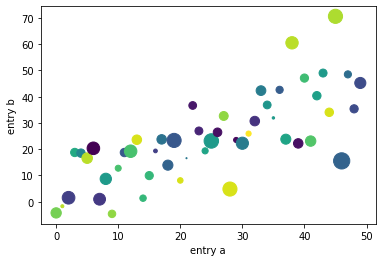

In [16]:
data = {
    'a': np.arange(50),
    'c': np.random.randint(0, 50, 50),
    'd': np.random.randn(50)
}

data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

<a name="cat"></a>
### categorical variables

[Return to MatPlotLib](#matplotlib)

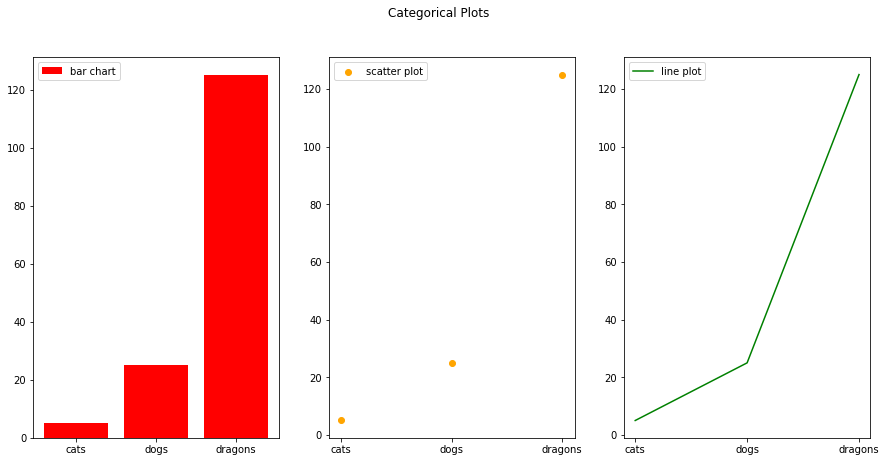

In [17]:
names = ['cats', 'dogs', 'dragons']
values = [5, 25, 125]
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.bar(names, values, color='red', label='bar chart')
plt.legend()
plt.subplot(132)
plt.scatter(names, values, color='orange', label='scatter plot')
plt.legend()
plt.subplot(133)
plt.plot(names, values, color='green', label'line plot')
plt.legend()
plt.suptitle('Categorical Plots')
plt.show()

<a name="pltsubplots"></a>
### subplots

[Return to MatPlotLib](#matplotlib)

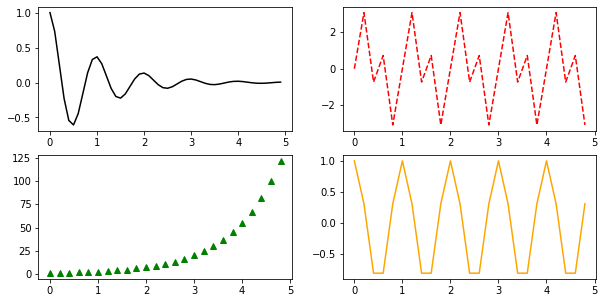

In [5]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.2)

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.plot(t1, f(t1), 'black')

plt.subplot(2,2,2)
plt.plot(t2, np.tan(2 * np.pi * t2), 'r--')

plt.subplot(2,2,3)
plt.plot(t2, np.exp(t2), 'g^')

plt.subplot(2,2,4)
plt.plot(t2, np.cos(2 * np.pi * t2), 'orange');

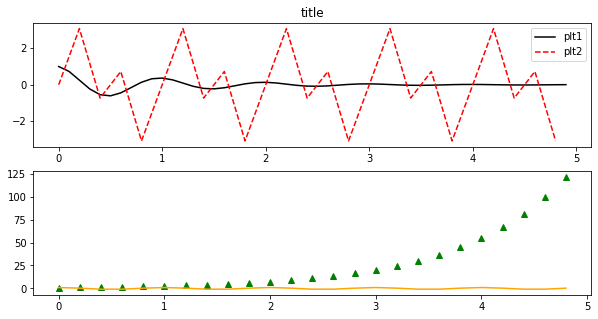

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.2)

plt.figure(figsize=(10,5))

ax = plt.subplot(2,1,1)
ax.plot(t1, f(t1), 'black', label='plt1')
ax.plot(t2, np.tan(2*np.pi*t2), 'r--', label='plt2')
ax.legend()
ax.set_title('title')

ax = plt.subplot(2,1,2)
ax.plot(t2, np.exp(t2), 'g^')
ax.plot(t2, np.cos(2*np.pi*t2), 'orange');

You can use figure numbers to create multiple figures.

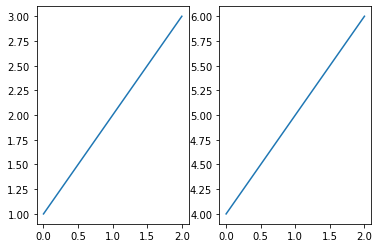

In [28]:
plt.figure(1)
plt.subplot(121)
plt.plot([1, 2, 3])
plt.subplot(122)
plt.plot([4, 5, 2]);

You can add subplots to an existing figure.

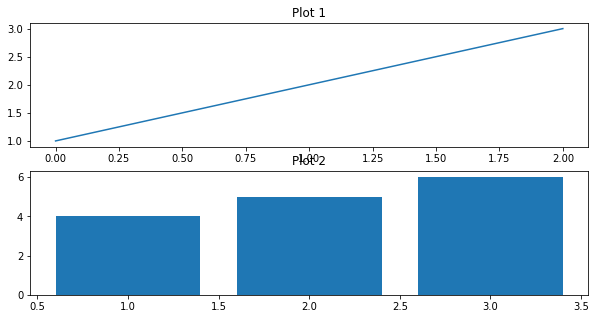

In [32]:
# you can specify plot size
fig = plt.figure(figsize=(10, 5))

# you can define whichever number of subplots and shema
ax1 = fig.add_subplot(211)
# you can plot matplotlibs or also pandas graphs
plt.plot([1, 2, 3])
ax1.set_title('Plot 1')

ax2 = fig.add_subplot(212)
plt.bar([1, 2, 3], [4, 5, 6]);
ax2.set_title('Plot 2')

# remember this
plt.show()

### text

[Return to MatPlotLib](#matplotlib)

source: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

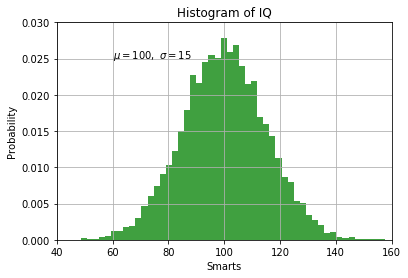

In [18]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

<a name="annotations"></a>
### text annotations

[Return to MatPlotLib](#matplotlib)

source: https://matplotlib.org/stable/tutorials/text/annotations.html

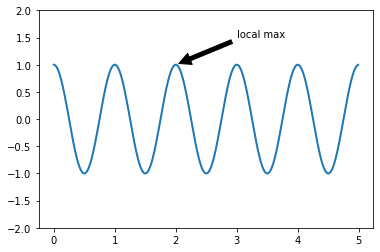

In [24]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = plt.plot(t, s, lw=2)
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(-2, 2)
plt.show()

<a name="scales"></a>
### different axis scales

[Return to MatPlotLib](#matplotlib)

adapted from: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

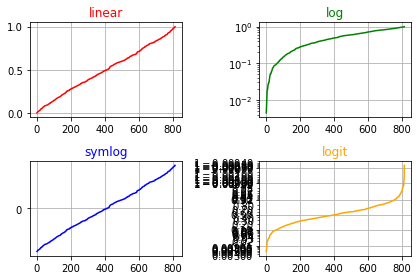

In [25]:
# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y, color='red')
plt.yscale('linear')
plt.title('linear', color='red')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y, color='green')
plt.yscale('log')
plt.title('log', color='green')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean(),color='blue')
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog', color='blue')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y, color='orange')
plt.yscale('logit')
plt.title('logit', color='orange')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.tight_layout()
plt.show()

<a name="save"></a>
### save plot as image

[Return to MatPlotLib](#matplotlib)

In [ ]:
# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.plot(x, y, color='red')
plt.yscale('linear')
plt.title('linear', color='red')
plt.grid(True)
plt.savefig('sample_plot.png')

---
<a name="seaborn"></a>
# Seaborn

[Return to Contents](#contents)

Seaborn functions usually accept as input data either a dataframe structure or series objects.  
It is preferred to use dataframe approach.

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<a name="snsbasic"></a>
### basic

[Return to Seaborn](#seaborn)

For most basic methods you can specify data through parameter data and then specifying the column or insted by simply passing the column serie extracted from the df.

In [34]:
ax = sns.lmplot(data=tips, x='total_bill', y='tip')
ax.set_title('This is the title')
ax.set_ylabel('y_label');

<a name="snstypes"></a>
### plot types

[Return to Seaborn](#seaborn)

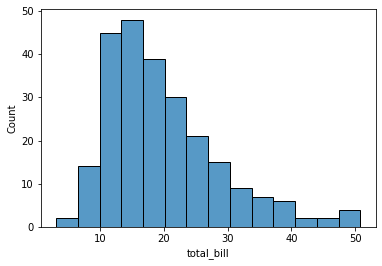

In [9]:
# --------------------- HISTOGRAM PLOT
# dataframe approach
sns.histplot(data=tips, x='total_bill');
# # series approach
# sns.histplot(x=tips['total_bill']);

# to plot horizontally
sns.histplot(data=tips, y='total_bill');

# to specify bins
sns.histplot(data=tips, x='total_bill', binwidth=3);
sns.histplot(data=tips, x='total_bill', bins=20);

# to color based on other data features use hue
sns.histplot(data=tips, x='total_bill', hue='sex');

# to add a kernel density to plot
sns.histplot(data=tips, x='total_bill', kde=True);

In [ ]:
# --------------------- SCATTER PLOT
sns.lmplot(data=tips, x='total_bill', y='tip', fit_reg=False);

# NOTE: this function is actually a method to fit regression line to data that has been tweak to hide the estimated regression line
# to plot it simply use the following
sns.lmplot(data=tips, x='total_bill', y='tip');

# to color by other data feature use hue
sns.lmplot(data=tips, x='total_bill', y='tip', fit_reg=False, hue='sex');

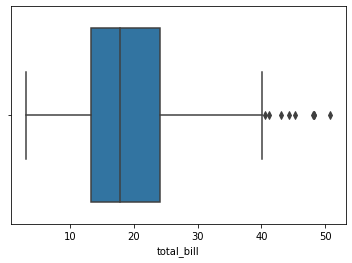

In [4]:
# --------------------- BOXPLOT
sns.boxplot(data=tips);
sns.boxplot(data=tips, x='total_bill');

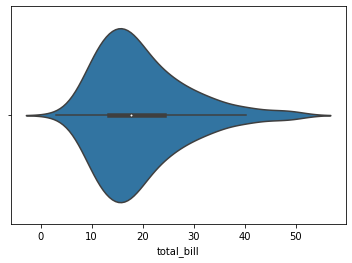

In [3]:
# --------------------- VIOLIN PLOT
sns.violinplot(data=tips);
sns.violinplot(data=tips, x='total_bill');

In [ ]:
# --------------------- HEATMAP
sns.heatmap(tips.corr());

<a name="snssubplots"></a>
### subplots

[Return to Seaborn](#seaborn)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(40, 5))

sns.histplot(ax=axes[0], data=full_df, x='tip', bins=20)
axes[0].set_title('Tip distribution')

sns.histplot(ax=axes[1], data=full_df, x='sex', bins=50)
axes[1].set_title('Sex distribution');

In [ ]:
plt.figure(figsize=(15, 7))

ax = plt.subplot(211)
sns.histplot(data=tips, x='tip', hue='sex')
ax.set_title('Tip distribution')

ax = plt.subplot(212)
sns.histplot(data=tips, x='total_bill', hue='sex')
ax.set_title('Total bill distribution');